In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
l = len(df[df['workclass']=='?'])
print('Percentage workclass unknown:',l/len(df)*100, '%')

Percentage workclass unknown: 5.638647461687294 %


In [9]:
l = len(df[df['occupation']=='?'])
print('Percentage occupation unknown:',l/len(df)*100, '%')

Percentage occupation unknown: 5.660145572924664 %


In [10]:
df[df['occupation']=='?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
df = df.drop(df[df.workclass == '?'].index)
df = df.drop(df[df.occupation == '?'].index)

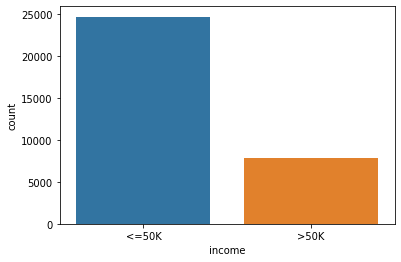

In [11]:
#df['income'].hist()
sns.countplot(x='income', data=df)

In [16]:
df[df['native.country']=='Honduras']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
535,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
4851,36,Local-gov,382635,Bachelors,13,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,Honduras,<=50K
6027,28,?,308493,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,17,Honduras,<=50K
10281,47,Private,243904,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Male,0,0,40,Honduras,<=50K
10519,58,State-gov,136982,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,40,Honduras,<=50K
15034,26,Self-emp-inc,246025,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,20,Honduras,<=50K
18998,31,Private,306459,1st-4th,2,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Honduras,<=50K
19521,18,Private,282609,5th-6th,3,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,30,Honduras,<=50K
26636,41,Self-emp-inc,146659,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,Honduras,<=50K
27828,28,Private,411587,Some-college,10,Never-married,Protective-serv,Own-child,White,Male,0,0,40,Honduras,<=50K


In [17]:
p_capitalgain0 = len(df[df['capital.gain']== 0])/len(df)*100
p_capitalloss0 = len(df[df['capital.loss']== 0])/len(df)*100
print(f"percentage capital gain equal to 0 : {p_capitalgain0} %, percentage capital loss equal to 0: {p_capitalloss0} %")

percentage capital gain equal to 0 : 91.67101747489328 %, percentage capital loss equal to 0: 95.33490986149073 %


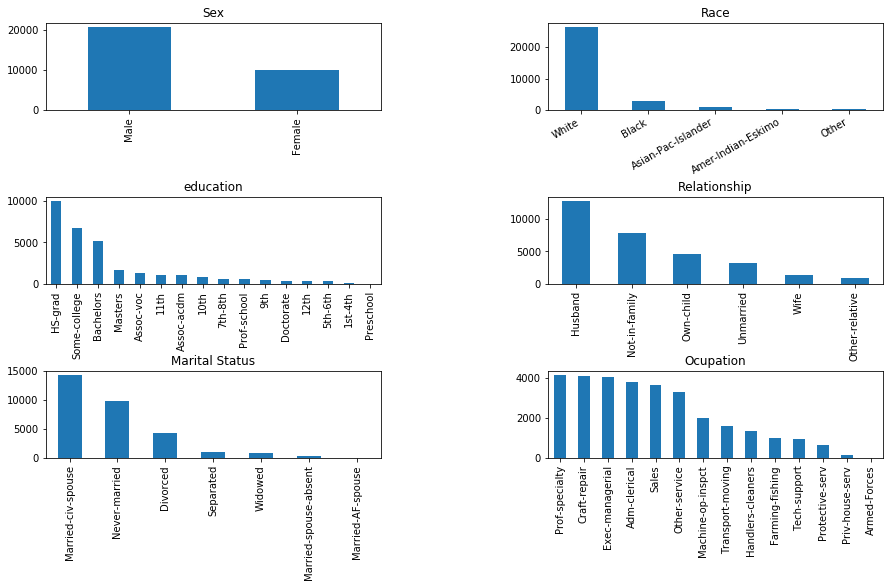

In [14]:
fig, ax = plt.subplots(3,2, figsize=(15,8))
df.sex.value_counts().plot(kind='bar', ax=ax[0,0])
df.race.value_counts().plot(kind='bar', ax=ax[0,1])
df.education.value_counts().plot(kind='bar', ax=ax[1,0])
df.relationship.value_counts().plot(kind='bar', ax=ax[1,1])
df['marital.status'].value_counts().plot(kind='bar',  ax=ax[2,0])
df.occupation.value_counts().plot(kind='bar', ax=ax[2,1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)
for label in ax[0,1].get_xticklabels():
  label.set_rotation(30)
  label.set_ha('right')
ax[0,0].set_title('Sex')
ax[0,1].set_title('Race')
ax[1,0].set_title('education')
ax[1,1].set_title('Relationship')
ax[2,0].set_title('Marital Status')
ax[2,1].set_title('Ocupation')
plt.show()

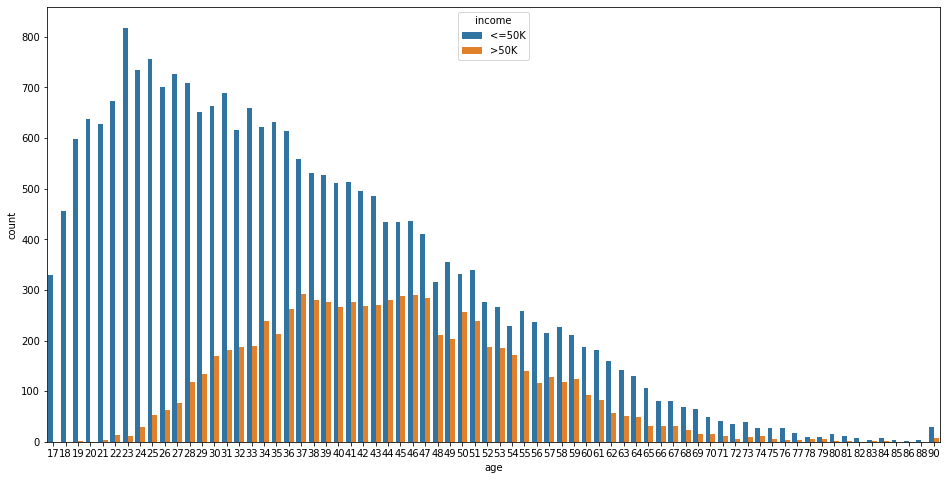

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='age', hue='income', data=df)

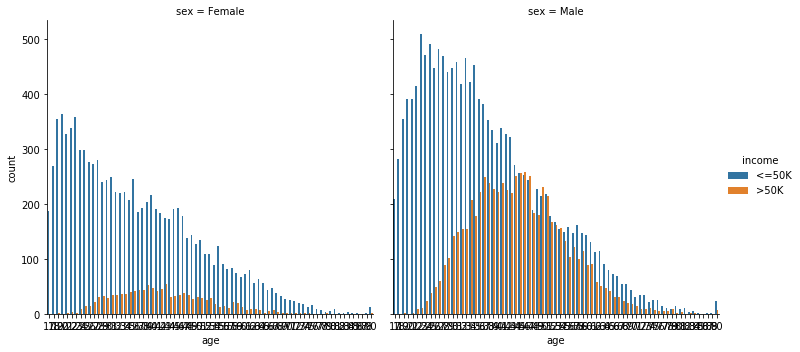

In [15]:

sns.catplot(x='age', hue='income', col='sex', kind='count', data=df)

In [ ]:
df[df['']=='Honduras']

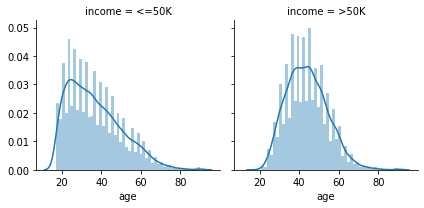

In [16]:
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")


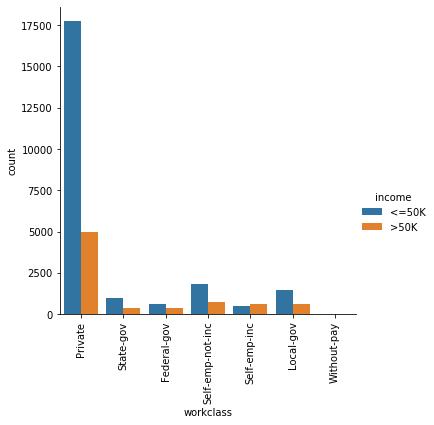

In [17]:
g = sns.catplot(data=df, x='workclass' , hue='income', kind='count')
g.set_xticklabels(rotation=90)

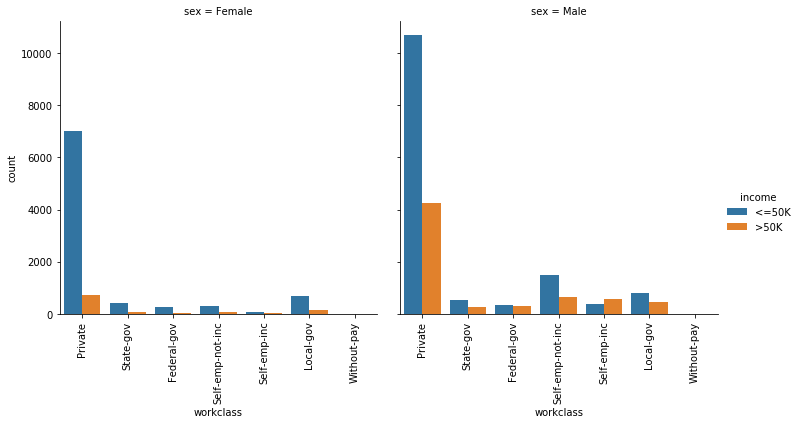

In [18]:
g = sns.catplot(data=df, x='workclass' , hue='income', col='sex', kind='count')
g.set_xticklabels(rotation=90)

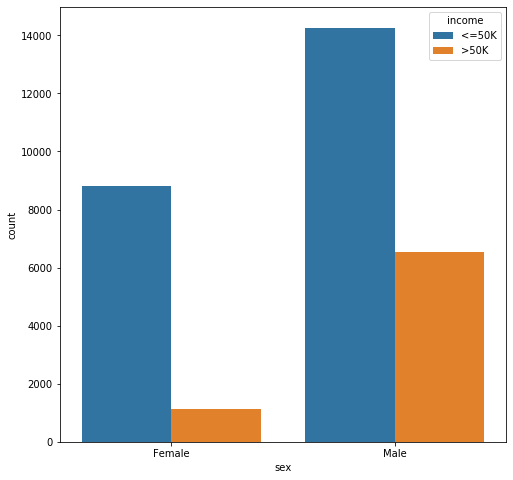

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='sex',ax=ax , hue='income', data=df)

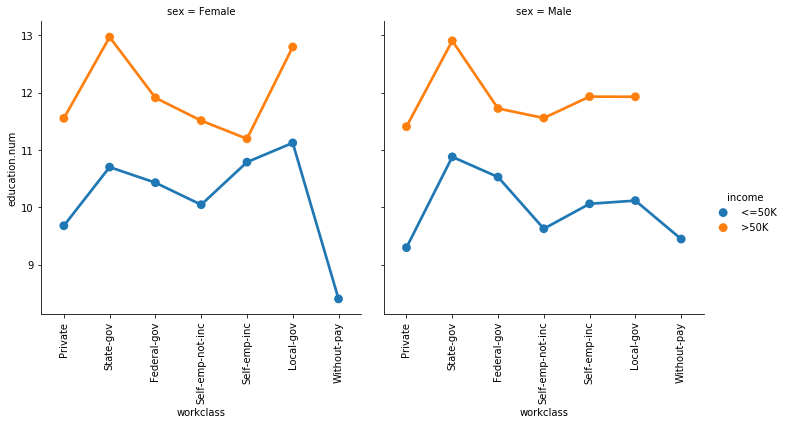

In [20]:
g = sns.catplot(data=df, x='workclass', y='education.num' , hue='income', col='sex', kind='point', ci=None)
g.set_xticklabels(rotation=90)

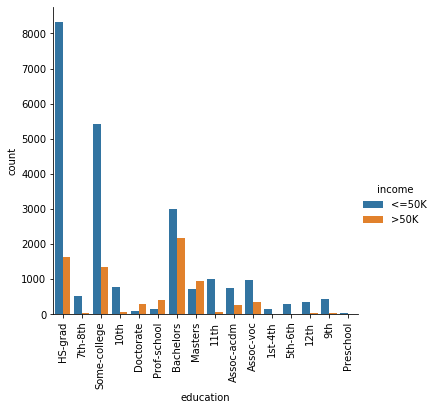

In [21]:
g = sns.catplot(data=df, x='education' , hue='income', kind='count')
g.set_xticklabels(rotation=90)

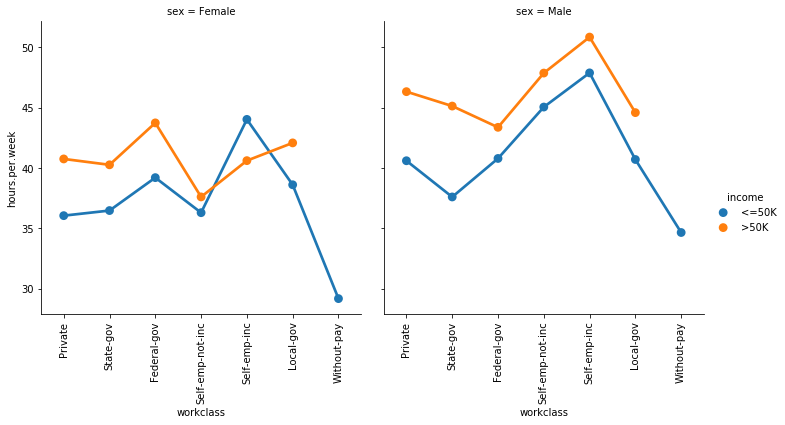

In [22]:
g = sns.catplot(data=df, x='workclass', y='hours.per.week' , hue='income', col='sex', kind='point', ci=None)
g.set_xticklabels(rotation=90)

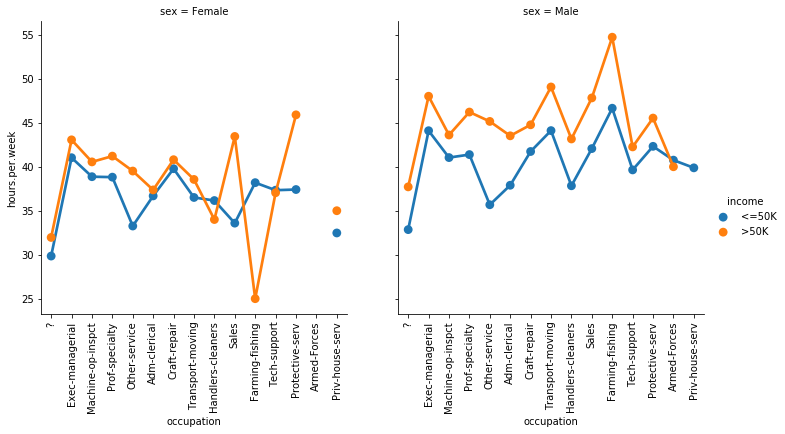

In [19]:
g = sns.catplot(data=df, x='occupation', y='hours.per.week' , hue='income', col='sex', kind='point', ci=None)
g.set_xticklabels(rotation=90)

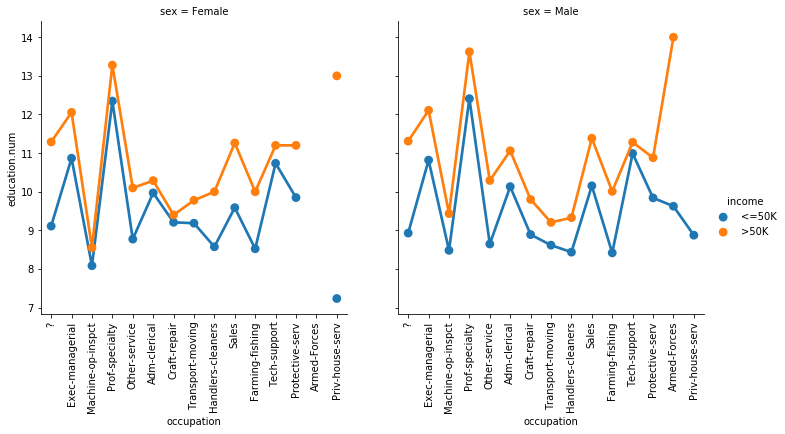

In [20]:
g = sns.catplot(data=df, x='occupation', y='education.num' , hue='income', col='sex', kind='point', ci=None)
g.set_xticklabels(rotation=90)

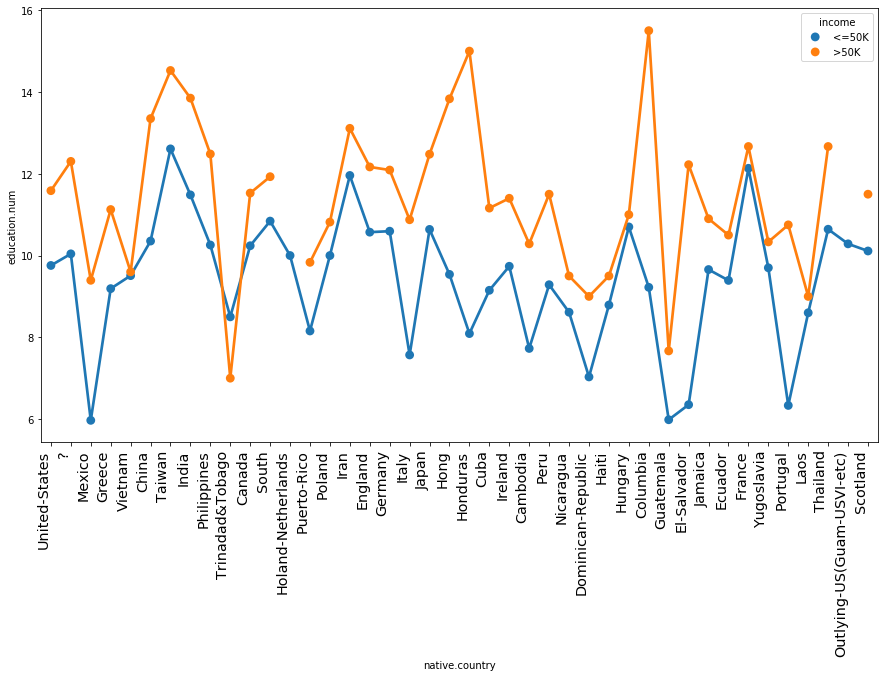

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.pointplot(x='native.country', y= 'education.num' , hue='income',ci=None, data=df, ax=ax)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()


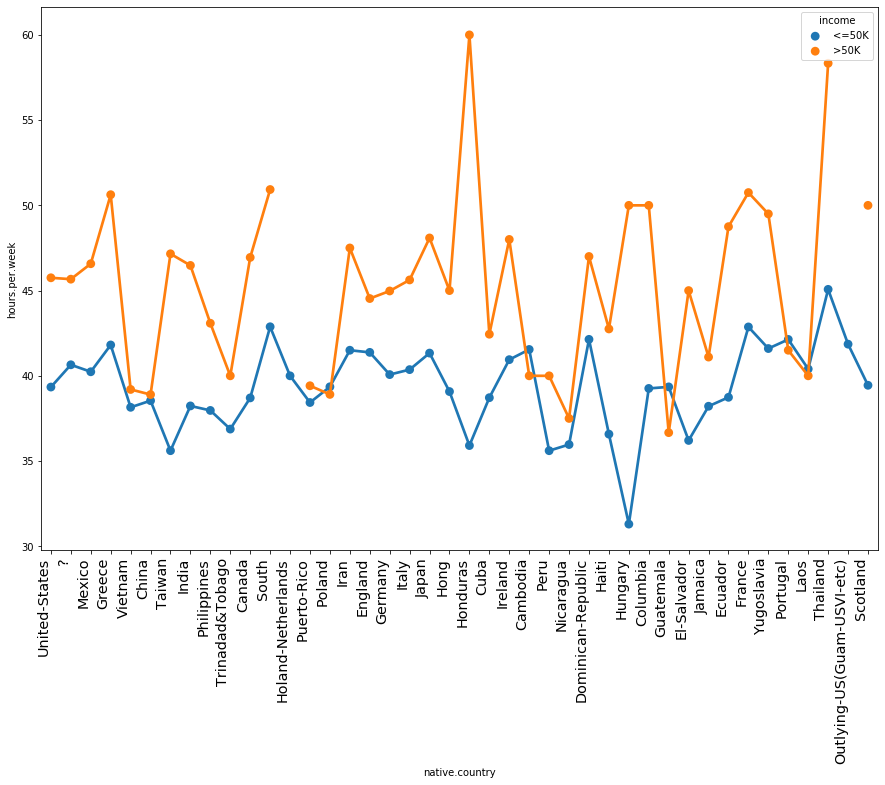

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.pointplot(x='native.country', y= 'hours.per.week' , hue='income',ci=None, data=df, ax=ax)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

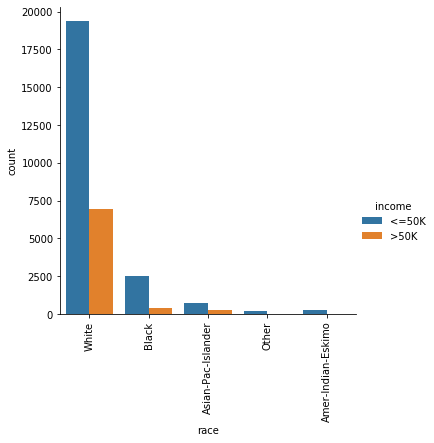

In [25]:
g = sns.catplot(data=df, x='race' , hue='income', kind='count')
g.set_xticklabels(rotation=90)

# Modeling

For the target variable we are going to change the values to 0 and 1.

In [28]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [32]:
def ch_target(x):
    if x == '<=50K':
        return 0
    else:
        return 1
df['income'] = df['income'].apply(ch_target)
    

In [33]:
df.income.unique()

array([0, 1], dtype=int64)

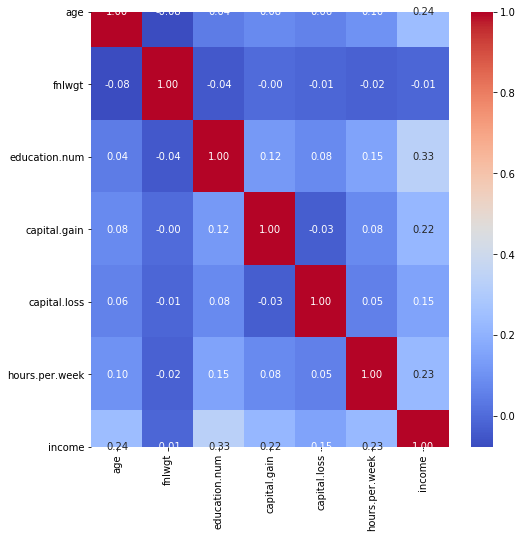

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [70]:
data = pd.get_dummies(data=df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country' ])

In [72]:
target = data.income
del data['income']

In [75]:
X = data.values
Y = target.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [81]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

In [82]:
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


c:\users\esteban\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: 0.790225 (0.007116)
LDA: 0.835557 (0.007440)
KNN: 0.767844 (0.007103)
CART: 0.806950 (0.007061)
NB: 0.788882 (0.006729)
SVM: 0.787133 (0.006633)


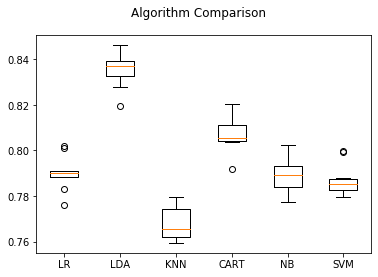

In [84]:
# Compare Algorithms
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [85]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.846097 (0.005838)
ScaledLDA: 0.835557 (0.007440)
ScaledKNN: 0.817041 (0.008642)
ScaledCART: 0.806624 (0.006731)
ScaledNB: 0.495446 (0.033608)
ScaledSVM: 0.842842 (0.005992)


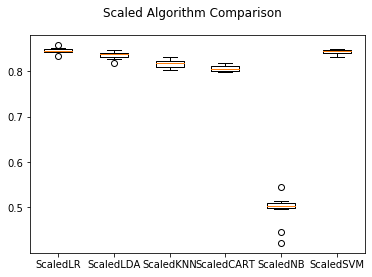

In [86]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [88]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.844998 using {'C': 0.3, 'kernel': 'linear'}
0.844917 (0.006473) with: {'C': 0.1, 'kernel': 'linear'}
0.779767 (0.006611) with: {'C': 0.1, 'kernel': 'poly'}
0.831285 (0.005102) with: {'C': 0.1, 'kernel': 'rbf'}
0.837511 (0.006029) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.844998 (0.006228) with: {'C': 0.3, 'kernel': 'linear'}
0.807398 (0.008676) with: {'C': 0.3, 'kernel': 'poly'}
0.838081 (0.005659) with: {'C': 0.3, 'kernel': 'rbf'}
0.837877 (0.004170) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.844836 (0.006123) with: {'C': 0.5, 'kernel': 'linear'}
0.817653 (0.005596) with: {'C': 0.5, 'kernel': 'poly'}
0.840482 (0.005619) with: {'C': 0.5, 'kernel': 'rbf'}
0.835436 (0.003730) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.844795 (0.006252) with: {'C': 0.7, 'kernel': 'linear'}
0.822984 (0.004665) with: {'C': 0.7, 'kernel': 'poly'}
0.841662 (0.004880) with: {'C': 0.7, 'kernel': 'rbf'}
0.830064 (0.004483) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.844754 (0.006201) with: {'C': 0.9, 'kernel': 'line

In [94]:
#tune LR
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":["liblinear"]}#
model=LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=grid,cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847115 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.819524 (0.007426) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.839057 (0.005847) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.843574 (0.004279) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.846016 (0.005337) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.847115 (0.005299) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.846545 (0.005278) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.846341 (0.005677) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.846097 (0.005838) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.846057 (0.005985) with: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.846057 (0.005985) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.846097 (0.005987) with: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.846057 (0.005985) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'libl

In [98]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8546549479166666
[[4306  306]
 [ 587  945]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4612
           1       0.76      0.62      0.68      1532

    accuracy                           0.85      6144
   macro avg       0.82      0.78      0.79      6144
weighted avg       0.85      0.85      0.85      6144

